In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy.stats import zscore


In [9]:
df_org = pd.read_csv('telecom_customer_churn.csv')
df_org.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Data Cleaning

Updating Avg Monthly Long Distance Charges and Multiple Lines columns based on Phone Service

In [10]:
for index in df_org.index:
  if df_org.loc[index, "Phone Service"] == "No":
    df_org.loc[index, "Avg Monthly Long Distance Charges"] = 0
    df_org.loc[index, "Multiple Lines"] = "No"

Updating the below columns based on the Internet Service

In [11]:
for index in df_org.index:
  if df_org.loc[index, "Internet Service"] == "No":
    df_org.loc[index, "Internet Type"] = "No Internet"
    df_org.loc[index, "Avg Monthly GB Download"] = 0
    df_org.loc[index, "Online Security"] = "No"
    df_org.loc[index, "Online Backup"] = "No"
    df_org.loc[index, "Device Protection Plan"] = "No"
    df_org.loc[index, "Premium Tech Support"] = "No"
    df_org.loc[index, "Streaming Music"] = "No"
    df_org.loc[index, "Streaming Movies"] = "No"
    df_org.loc[index, "Streaming TV"] = "No"
    df_org.loc[index, "Unlimited Data"] = "No"

In [12]:
df_org["Offer"] = df_org["Offer"].fillna("None")

In [13]:
df_org.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


Creating a new feature [Avg Monthly Revenue]

In [14]:
df_org["Avg Monthly Revenue"]= (df_org["Total Revenue"]/ df_org["Tenure in Months"]).round(2)

In [15]:
df_org["Avg Monthly Revenue"]

,Avg Monthly Revenue
0,108.31
1,67.81
2,103.86
3,123.04
4,96.51
...,...
7038,103.83
7039,101.37
7040,65.00
7041,71.19


<Axes: xlabel='Avg Monthly Revenue', ylabel='Count'>

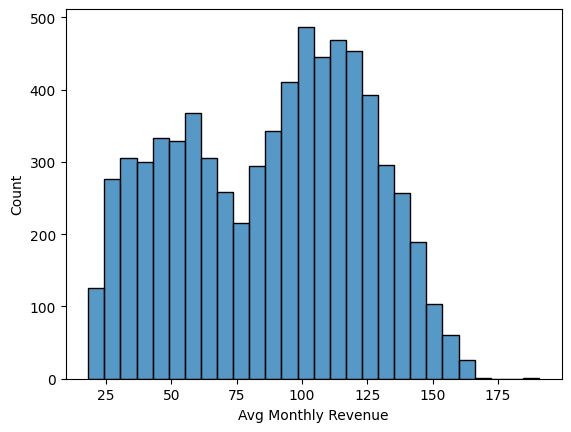

In [16]:
sns.histplot(df_org["Avg Monthly Revenue"])

Removing joined customers

In [17]:
df_org= df_org.loc[df_org["Customer Status"] != "Joined"]

In [8]:
# Checking for Duplicates
duplicate_count = df_org.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### Handeling Outliers

In [ ]:
# Columns to check
columns_to_check = ["Number of Referrals", "Tenure in Months", "Avg Monthly Long Distance Charges",
                     "Avg Monthly GB Download", "Monthly Charge", "Avg Monthly Revenue"]

# Compute Z-scores
z_scores = np.abs(zscore(df_org[columns_to_check], nan_policy='omit'))

threshold = 3

# Identify outliers (Z-score > threshold)
outlier_mask = (z_scores > threshold)

# Count outliers per column
outlier_counts = outlier_mask.sum(axis=0)

# Print result
for col, count in zip(columns_to_check, outlier_counts):
    print(f"{col}: {count} outliers")


Number of Referrals: 0 outliers
Tenure in Months: 0 outliers
Avg Monthly Long Distance Charges: 0 outliers
Avg Monthly GB Download: 46 outliers
Monthly Charge: 0 outliers
Avg Monthly Revenue: 0 outliers


<Axes: xlabel='Avg Monthly GB Download', ylabel='Count'>

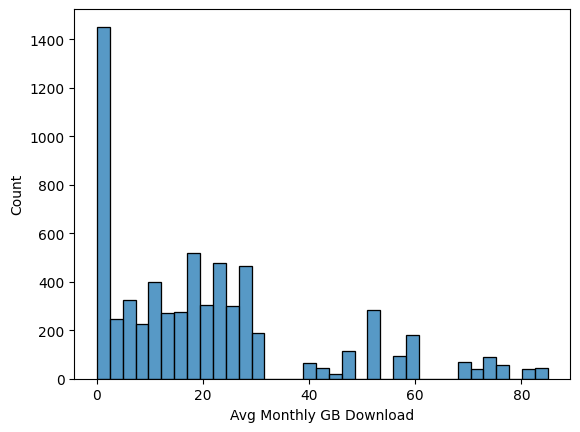

In [ ]:
sns.histplot(df_org["Avg Monthly GB Download"])

Saving the cleaned dataframe

In [ ]:
df_org.to_csv("cleaned_data.csv", index=False)

In [ ]:
df_cleaned = pd.read_csv("cleaned_data.csv")

## Handling Unbalanced Data


In [ ]:
df_cleaned["Customer Status"].value_counts(normalize= True)

,proportion
Customer Status,
Stayed,0.716345
Churned,0.283655


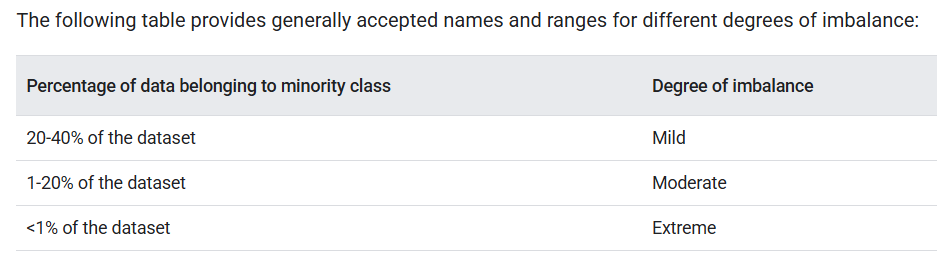

[Google: Handling Imbalanced Datasets](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)

In [ ]:
df_cleaned["Customer Status"].value_counts()

,count
Customer Status,
Stayed,4720
Churned,1869


It is moderately imbalanced. Most machine learning models will still be biased toward the majority class unless you address it.

Need to do this especially if:

The minority class is more important (e.g., fraud detection, churn prediction, disease detection).

You care about recall or precision of the minority class, not just accuracy.

You notice poor performance on the minority class during validation.

1. Downsampling and Upweighting

In [ ]:
# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned['Customer Status'] == "Stayed"]
df_minority = df_cleaned[df_cleaned['Customer Status'] == "Churned"]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:
df_balanced["Customer Status"].value_counts()

,count
Customer Status,
Stayed,1869
Churned,1869


Upweighting needs to be done when defining the models


In [ ]:
df_balanced.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Avg Monthly Revenue'],
      dtype='object')

**Try SMOTE**

### Label Encoding

In [ ]:
df_cleaned.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Avg Monthly Revenue'],
      dtype='object')

In [ ]:
one_hot_encoding_vars = ['Gender', 'Married', 'Number of Dependents', "Offer", "Phone Service","Multiple Lines",
                         "Internet Service","Internet Type", 'Online Security', 'Online Backup', 'Device Protection Plan',
                          'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music', 'Unlimited Data',
                         'Contract', 'Paperless Billing' ,'Payment Method']
df_ready = pd.get_dummies(df_balanced, columns= one_hot_encoding_vars, drop_first= True, dtype= int)

In [ ]:
df_ready.head()

,Customer ID,Age,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,5035-BVCXS,20,Loyalton,96118,39.637471,-120.226338,0,11,13.55,27.0,...,0,0,0,0,1,0,0,1,1,0
1,7519-JTWQH,30,Calipatria,92233,33.143826,-115.497485,0,69,23.92,42.0,...,1,1,1,1,1,0,1,1,0,0
2,5084-OOVCJ,25,Canyon Dam,95923,40.171312,-121.120605,1,17,20.23,69.0,...,1,0,0,0,1,0,0,1,1,0
3,6242-MBHPK,67,Hathaway Pines,95233,38.184914,-120.364085,1,23,41.88,12.0,...,0,1,1,1,1,1,0,1,0,0
4,8659-HDIYE,68,Los Angeles,90067,34.057496,-118.413959,0,64,27.70,21.0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
df_ready.to_csv("df_ready.csv", index= False)